# Programming for data science: data analysis project

## Cars for sale in the US: an analysis





**Student**: Gianello Alessio <br>
**ID**: VR502062

## Import and Clean of the dataset

This dataset provides comprehensive information about used cars available for sale in the United States. It includes detailed data on various aspects of each vehicle, making it a valuable resource for car buyers, sellers, and data enthusiasts. 
The dataset contains the following key attributes:
- Model: The specific model of the car.
- Mileage: The number of miles the car has been driven.
- Year: The manufacturing year of the car.
- Status: Indicates whether the car is new, used, or certified pre-owned.
- Dealer: Information about the dealer or seller offering the car.
- Price: The listed price of the car in USD.

dataset source: https://www.kaggle.com/datasets/juanmerinobermejo/us-sales-cars-dataset



Useful imports:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading data
cars_list_df = pd.read_csv('cars.csv', encoding='utf-16')

In [3]:
# Taking a look at what we have at hand
cars_list_df.head(10)

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0
5,Volkswagen,Golf,2022,Certified,13895.0,Volkswagen of Beaumont,34000.0
6,GMC,Yukon,2021,Used,68506.0,BMW of Beaumont,56954.0
7,BMW,M340,2023,New,NaN,BMW of Beaumont,61715.0
8,Hyundai,Sonata,2023,New,NaN,Hyundai of Silsbee,37945.0
9,Hyundai,Sonata,2023,New,NaN,Hyundai of Silsbee,33495.0


In [4]:
# Taking a closer look
cars_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51793 entries, 0 to 51792
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    51793 non-null  object 
 1   Model    51793 non-null  object 
 2   Year     51793 non-null  int64  
 3   Status   51793 non-null  object 
 4   Mileage  22981 non-null  float64
 5   Dealer   51689 non-null  object 
 6   Price    50644 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.8+ MB


Set columns name to lower case:

In [5]:
cars_list_df.columns = cars_list_df.columns.map(lambda x: x.lower())

It's evident that there are a lot of null values, mainly in column 4, more precisely:

In [6]:
#percentage of not-null values in each columns, i define a function beacuse I'll surely need to use it later

def get_null_percentage(df): 
 df_length =len(df)
 return (df.notnull().sum()/df_length)*100 

get_null_percentage(cars_list_df)


brand      100.000000
model      100.000000
year       100.000000
status     100.000000
mileage     44.370861
dealer      99.799201
price       97.781553
dtype: float64

## Managing null values

Mileage has a huge percentage of null values. It may be tempting to drop them, but getting a closer look:

In [7]:
cars_list_df[cars_list_df['status'] == 'New'] 

,brand,model,year,status,mileage,dealer,price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
7,BMW,M340,2023,New,NaN,BMW of Beaumont,61715.0
8,Hyundai,Sonata,2023,New,NaN,Hyundai of Silsbee,37945.0
...,...,...,...,...,...,...,...
51788,Chevrolet,Corvette,2023,New,NaN,Chase Chevrolet,122455.0
51789,Chevrolet,Corvette,2023,New,NaN,Chase Chevrolet,125930.0
51790,Jeep,Wrangler,2023,New,NaN,Stockton Dodge Chrysler Jeep RAM,53715.0
51791,Jeep,Wrangler,2023,New,NaN,Stockton Dodge Chrysler Jeep RAM,91450.0


We may think that mileage is null on New cars, let's check it:

In [8]:
cars_list_df[(cars_list_df['status'] != 'New') & (cars_list_df['mileage'].isna())] 

,brand,model,year,status,mileage,dealer,price
29127,BMW,Coupe,2023,Used,NaN,BMW of Gwinnett Place,48175.0


So we put it at 0

In [9]:
cars_list_df['mileage'].fillna(0, inplace=True) # Inplace = True edits the original df

/var/folders/k3/ht8njn1154b53qxw_z6l_7hm0000gp/T/ipykernel_30887/1489725974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_list_df['mileage'].fillna(0, inplace=True) # Inplace = True edits the original df


In [10]:
cars_list_df = cars_list_df.dropna(subset=['price'])


We still need to handle the null values in the 'Dealer' field. Since this is a descriptive (and not quantitative) field, we will replace the null values with 'unknown_dealer'


In [11]:
cars_list_df['dealer'].fillna('unkown_dealer', inplace=True) # Inplace = True edits the original df

/var/folders/k3/ht8njn1154b53qxw_z6l_7hm0000gp/T/ipykernel_30887/1615861386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_list_df['dealer'].fillna('unkown_dealer', inplace=True) # Inplace = True edits the original df


We now shouldn't have colums with null values, let's check it:

In [12]:
#percentage of not-null values in each columns

get_null_percentage(cars_list_df)

brand      100.0
model      100.0
year       100.0
status     100.0
mileage    100.0
dealer     100.0
price      100.0
dtype: float64

## Analysis of attributes and links between them

In the following sections I'll perform a .value_counts() for every descriptive column of the dataframe, to check for anomalies.

In [13]:
cars_list_df.brand.value_counts().sort_index() #Sorting index for a faster check for troubles

brand
Acura                   819
Alfa Romeo              173
Aston Martin             71
Audi                   1493
BMW                    2422
Bentley                 103
Buick                   465
Cadillac               1150
Chevrolet              5008
Chrysler                342
Dodge                  1205
FIAT                     28
Ferrari                  47
Ford                   6383
GMC                    2581
Genesis                 589
Geo                       1
Honda                  2012
Hummer                   19
Hyundai                1129
Infiniti                553
International Scout       1
Isuzu                     1
Jaguar                  268
Jeep                   3224
Karma                     4
Kia                    1709
Lamborghini              37
Land Rover              842
Lexus                  1788
Lincoln                 587
Lotus                     3
Lucid                     4
MINI                    127
Maserati                149
Maybach       

In [14]:
def isCountDifferent(dataframe, column_name):
    indexes =dataframe[column_name].value_counts().index
    formatted_indexes = indexes.map(lambda x: x.lower().replace(' ','_').replace('-',''))
    return len(formatted_indexes)!=len(indexes)

isCountDifferent(cars_list_df, 'brand')

False

In [15]:
cars_list_df.brand.value_counts() #Sorting index for a faster check for troubles

brand
Ford                   6383
Chevrolet              5008
Toyota                 4645
Jeep                   3224
GMC                    2581
BMW                    2422
Mercedes               2050
Honda                  2012
RAM                    1812
Lexus                  1788
Kia                    1709
Audi                   1493
Nissan                 1472
Dodge                  1205
Mazda                  1189
Cadillac               1150
Hyundai                1129
Volkswagen             1045
Subaru                  849
Land Rover              842
Acura                   819
Volvo                   695
Porsche                 683
Genesis                 589
Lincoln                 587
Infiniti                553
Buick                   465
Tesla                   351
Chrysler                342
Mitsubishi              284
Jaguar                  268
Alfa Romeo              173
Maserati                149
MINI                    127
Bentley                 103
Aston Martin  

In [16]:
isCountDifferent(cars_list_df, 'model')

False

So there aren't doubles in car models or brands caused by format problems, I can get back to my analysis

In [17]:
cars_list_df.year.value_counts().sort_index()

year
1959        1
1967        1
1968        1
1969        3
1970        3
1971        4
1972        2
1973        4
1975        2
1976        1
1977        5
1978        1
1979        4
1982        5
1983        1
1984        3
1985        2
1986        3
1987        9
1988        3
1989        8
1990       12
1991        4
1992        5
1993        9
1994       14
1995       18
1996       12
1997       11
1998       11
1999       26
2000       42
2001       44
2002       65
2003       58
2004      105
2005      105
2006      147
2007      182
2008      217
2009      159
2010      243
2011      371
2012      430
2013      591
2014      765
2015      986
2016     1148
2017     1493
2018     1765
2019     2280
2020     3149
2021     3345
2022     4135
2023    20466
2024     8165
Name: count, dtype: int64

It seems like most of the cars are from recent years, I'll check it later

In [18]:
cars_list_df.status.value_counts().sort_index()

status
Certified     3076
New          27669
Used         19899
Name: count, dtype: int64

In [19]:
cars_list_df.dealer.value_counts().sort_index()

dealer
#1 Brookville Chevrolet Buick           1
#1 Cochran Cadillac Monroeville         4
#1 Cochran Chevrolet                    2
#1 Cochran Chrysler Dodge Jeep Ram      4
#1 Cochran Ford                         3
                                     ... 
iDrive Motors                           5
iDrive1 Motorcars                       3
iGOTCARS                               27
unkown_dealer                         103
xDrive Motors Inc.                      2
Name: count, Length: 8513, dtype: int64

In [20]:
cars_list_df['dealer'].nunique()

8513

Get rid of '#1 ' in the dealers name and see if number change:

In [21]:
cars_list_df['dealer'].apply(
    lambda x: x.replace(x[:3], '') if x.startswith('#1') else x
).nunique()

8513

Now I can safely assign the correct value to the column:

In [22]:
cars_list_df['dealer'] = cars_list_df['dealer'].apply(
    lambda x: x.replace(x[:3], '') if x.startswith('#1') else x
)

Now I want to check the correlations between the variables of this dataframe:

In [23]:
cars_list_df_corr = cars_list_df.corr(numeric_only = True)
cars_list_df_corr

,year,mileage,price
year,1.000000,-0.733715,0.331822
mileage,-0.733715,1.000000,-0.413471
price,0.331822,-0.413471,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

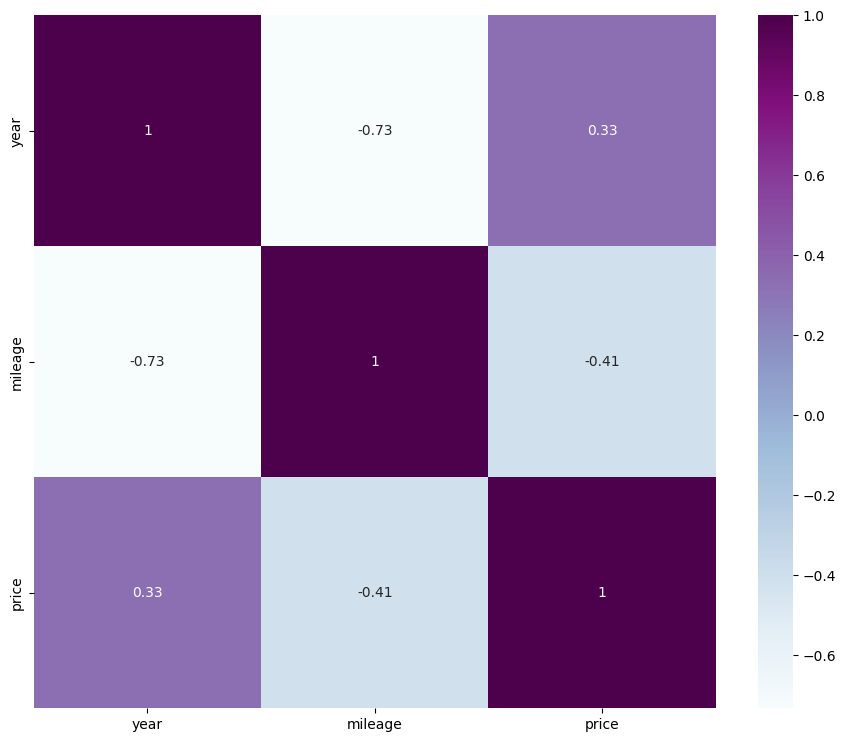

In [24]:
plt.figure(figsize=(11,9))
sns.heatmap(cars_list_df_corr, annot=True, cmap="BuPu")
plt.show

I see that Year and Mileage have a decent negative correlation (and it makes sense: newer the car, lower the milege), furthermore I see a small correlation between year and price, and as it may be expected i see that mileage and price are negatively correlated.

We now proceed to show some scatterplots to give a first graphic analysis of the dataset:

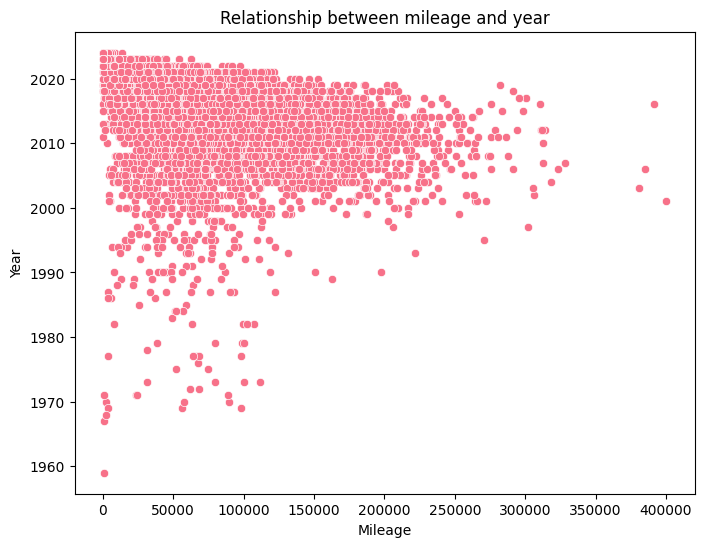

In [25]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=cars_list_df, x='mileage', y='year')
plt.xlabel('Mileage')
plt.ylabel('Year')
plt.title('Relationship between mileage and year')
plt.show()

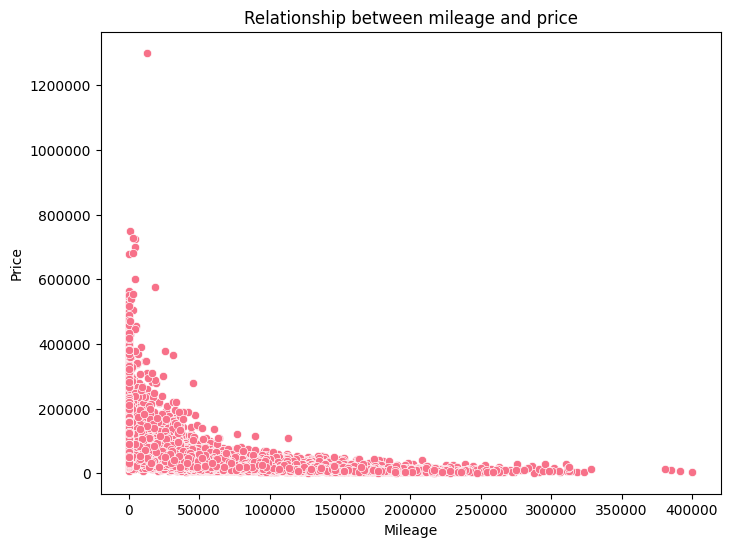

In [26]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=cars_list_df, x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Relationship between mileage and price')
plt.show()

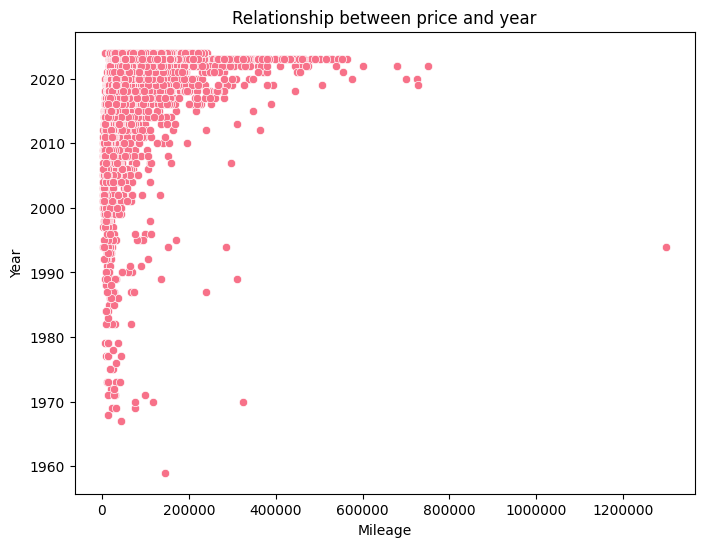

In [27]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=cars_list_df, x='price', y='year')
plt.xlabel('Mileage')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Year')
plt.title('Relationship between price and year')
plt.show()

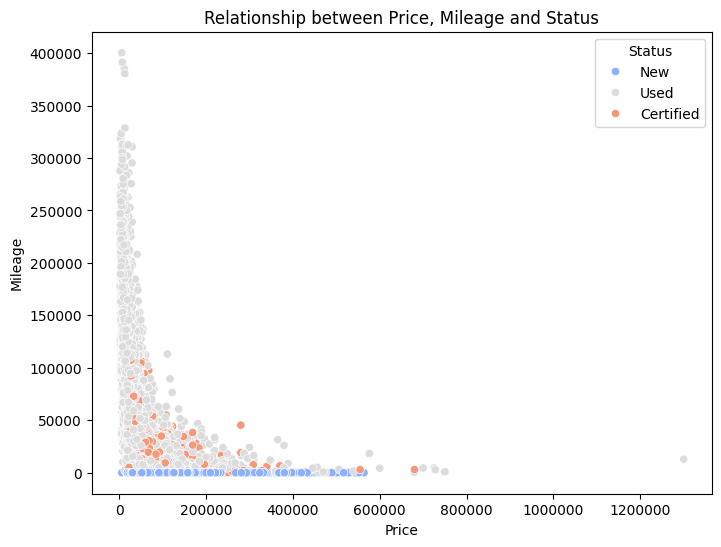

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cars_list_df, x='price', y='mileage', hue='status', palette='coolwarm')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Relationship between Price, Mileage and Status')
plt.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper right')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

A similar plot, but only for first 15 brands by frequency:

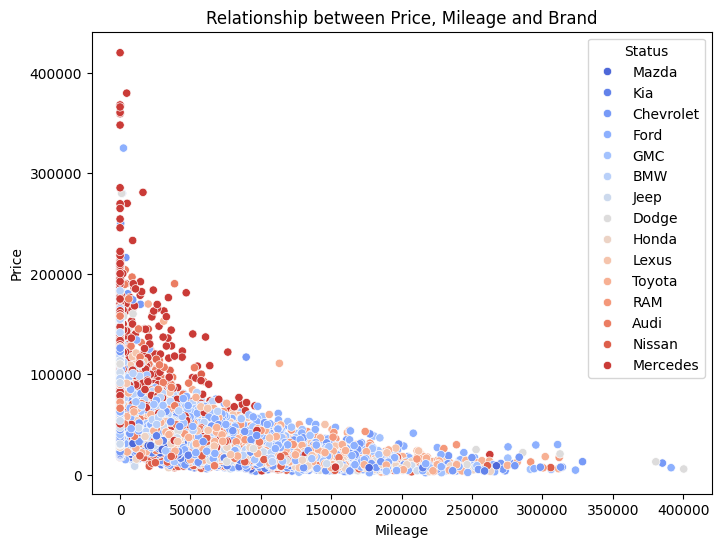

In [29]:
top_15_brands = cars_list_df['brand'].value_counts().nlargest(15).index.to_list() # sorted by default
filtered_by_brands_df = cars_list_df[cars_list_df['brand'].isin(top_15_brands)]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_by_brands_df, x='mileage', y='price', hue='brand', palette='coolwarm')
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.title('Relationship between Price, Mileage and Brand')
plt.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper right')
plt.show()

## EDA


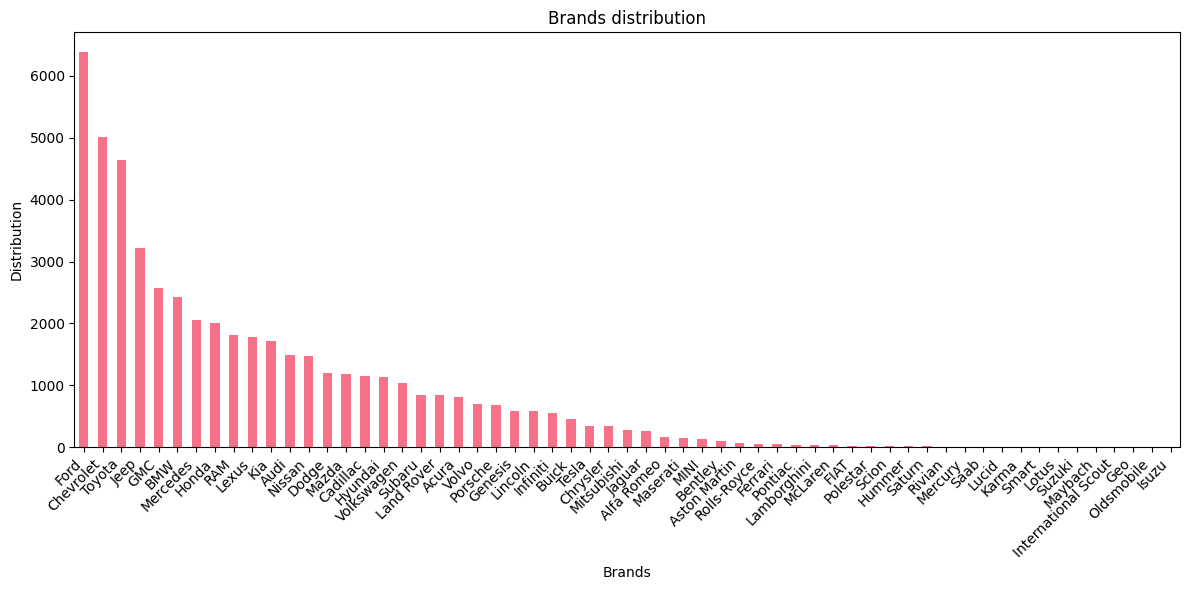

In [30]:
plt.figure(figsize=(12, 6))
cars_list_df.brand.value_counts().plot(kind='bar')
plt.title('Brands distribution')
plt.xlabel('Brands')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

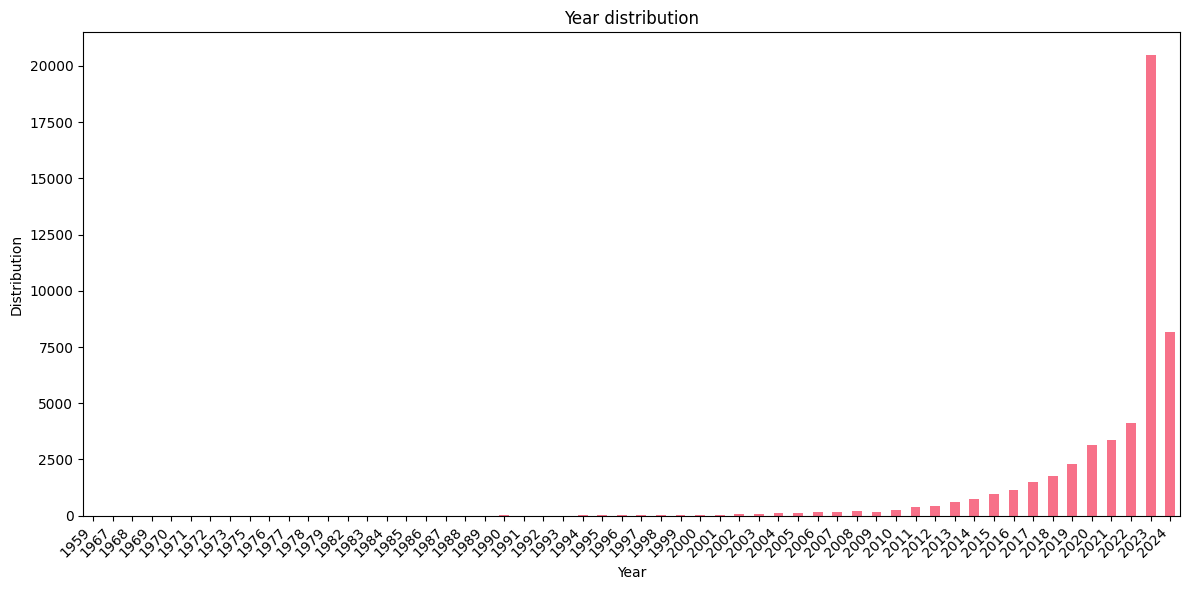

In [31]:
plt.figure(figsize=(12, 6))
cars_list_df.year.value_counts().sort_index().plot(kind='bar')
plt.title('Year distribution')
plt.xlabel('Year')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

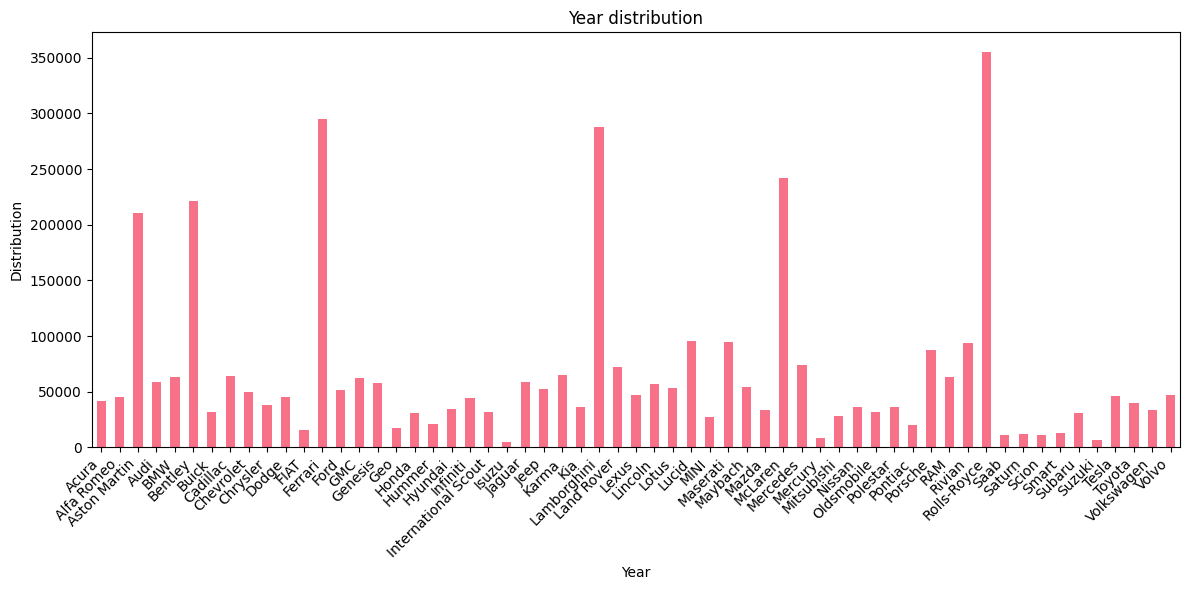

In [32]:
mean_price_per_brand = cars_list_df.groupby('brand')['price'].mean()
plt.figure(figsize=(12, 6))
mean_price_per_brand.plot(kind='bar')
plt.title('Year distribution')
plt.xlabel('Year')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

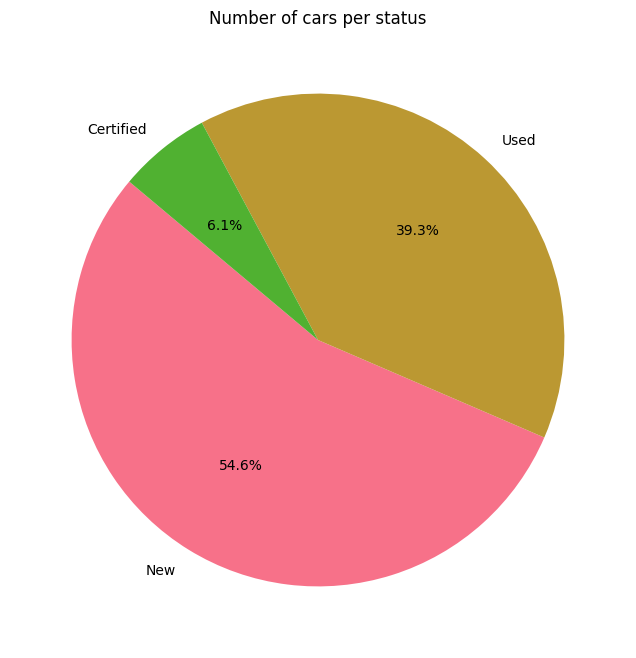

In [33]:
dealers_group_counts = cars_list_df['status'].value_counts()

# Create the pie graph
plt.figure(figsize=(8, 8))
plt.pie(dealers_group_counts, labels=dealers_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of cars per status')
plt.show()

Most sold model for each brand and its quantity:

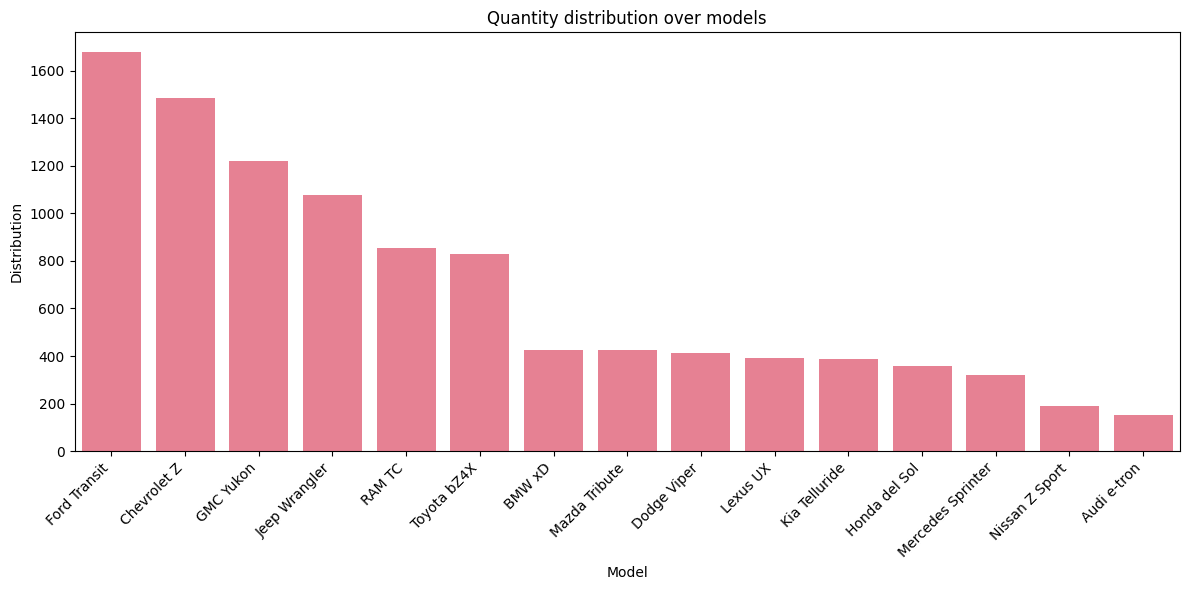

In [34]:
sales_count = filtered_by_brands_df.groupby(['brand', 'model']).size().reset_index(name='sales_count')
most_sold = sales_count.groupby('brand').max().sort_values('sales_count', ascending=False)
most_sold = most_sold.reset_index()
most_sold['brand_model'] = most_sold['brand'] +' '+most_sold['model']
most_sold
plt.figure(figsize=(12, 6))
sns.barplot(data=most_sold, x='brand_model', y='sales_count')
plt.title('Quantity distribution over models')
plt.xlabel('Model')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Least sold:

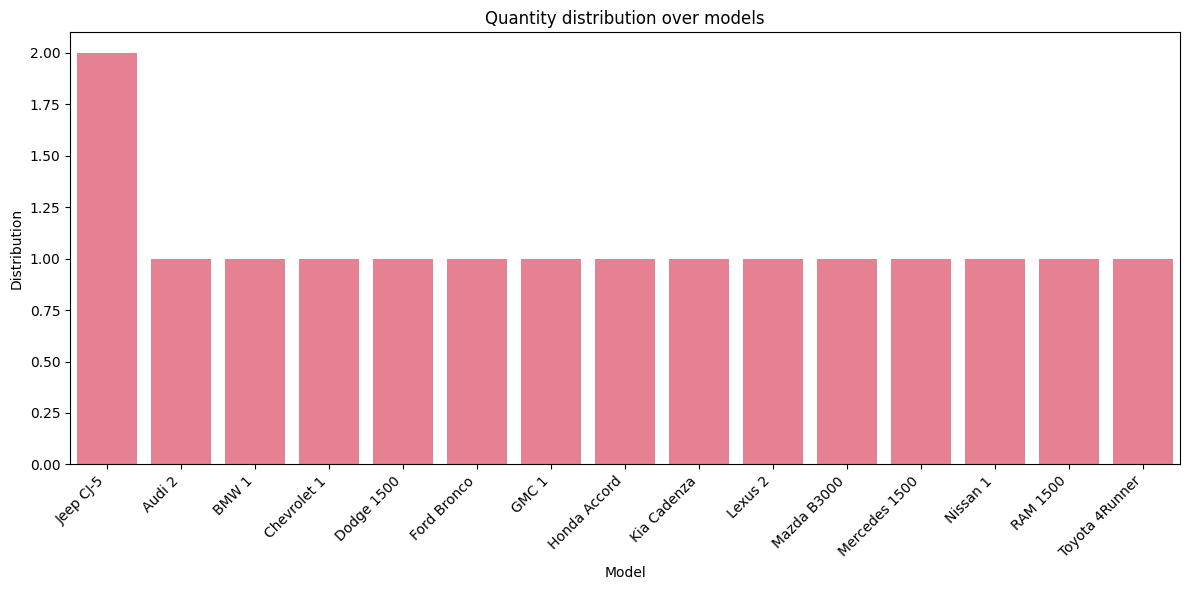

In [35]:

least_sold = sales_count.groupby('brand').min().sort_values('sales_count', ascending=False)
least_sold = least_sold.reset_index()
least_sold['brand_model'] = least_sold['brand'] +' '+least_sold['model']
plt.figure(figsize=(12, 6))
sns.barplot(data=least_sold, x='brand_model', y='sales_count')
plt.title('Quantity distribution over models')
plt.xlabel('Model')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most sold brand per dealer, considering first 15 dealers by number of cars for sale

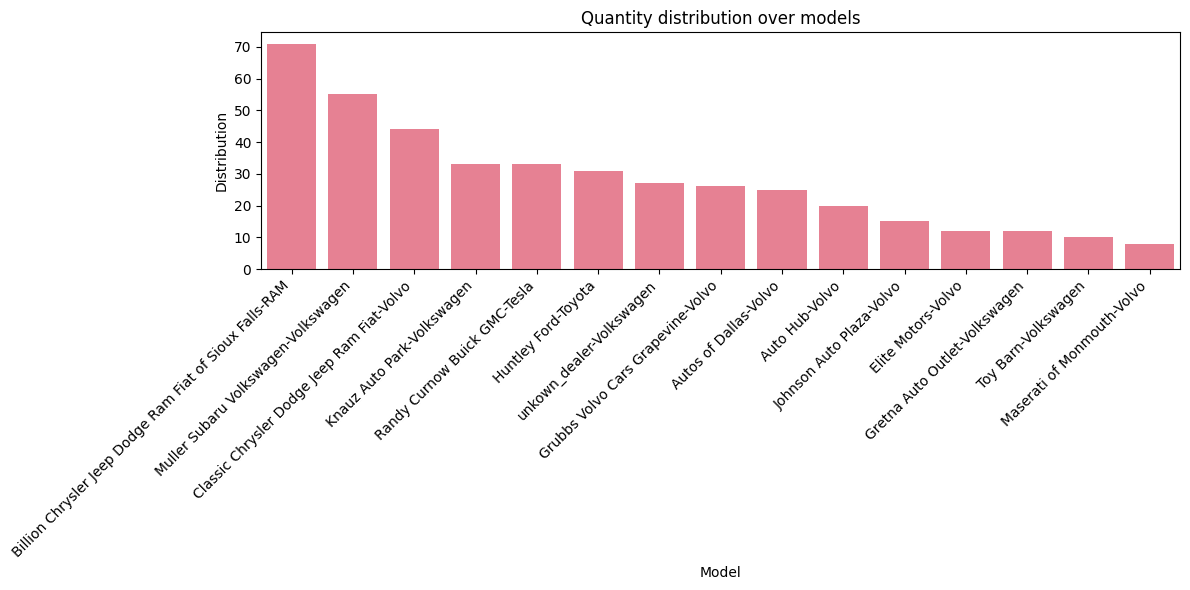

In [36]:
##top_15_dealers = cars_list_df['dealer'].value_counts().nlargest(15).index.to_list()
filtered_by_dealers_df = cars_list_df[cars_list_df['dealer'].isin(top_15_dealers)]
sales_count = filtered_by_dealers_df.groupby(['dealer', 'brand']).size().reset_index(name='sales_count')
most_sold_by_dealer = sales_count.groupby('dealer').max().sort_values('sales_count', ascending=False)
most_sold_by_dealer = most_sold_by_dealer.reset_index()
most_sold_by_dealer
most_sold_by_dealer['dealer_brand'] = most_sold_by_dealer['dealer'] +'-'+most_sold_by_dealer['brand']
plt.figure(figsize=(12, 6))
sns.barplot(data=most_sold_by_dealer, x='dealer_brand', y='sales_count')
plt.title('Quantity distribution over models')
plt.xlabel('Model')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most sold model per dealer, considering first 15 dealers by number of cars for sale

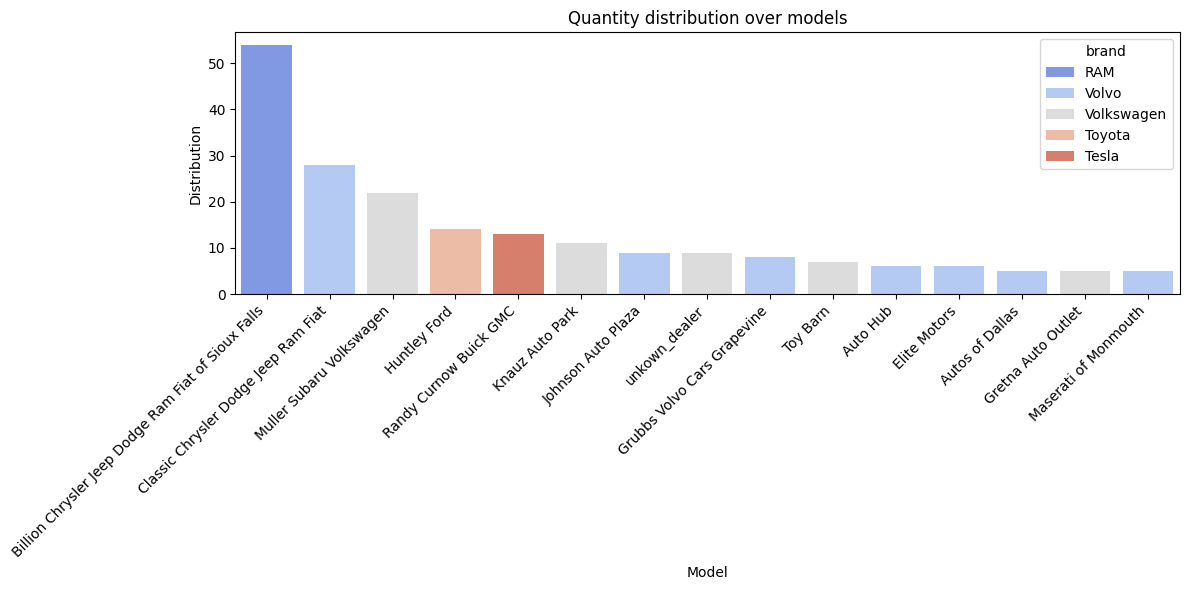

In [37]:
sales_count = filtered_by_dealers_df.groupby(['dealer', 'brand','model']).size().reset_index(name='sales_count')
most_sold_model_by_dealer = sales_count.groupby('dealer').max().sort_values('sales_count', ascending=False)
most_sold_model_by_dealer = most_sold_model_by_dealer.reset_index()
most_sold_model_by_dealer['brand_model'] = most_sold_model_by_dealer['brand'] +'-'+most_sold_model_by_dealer['model']
plt.figure(figsize=(12, 6))
sns.barplot(data=most_sold_model_by_dealer, x='dealer', y='sales_count',  hue='brand', palette='coolwarm')
plt.title('Quantity distribution over models')
plt.xlabel('Model')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()